Xây dựng mạng ANN phân lớp fashion. Khai báo các gói numpy, mnist, keras
https://victorzhou.com/blog/keras-neural-network-tutorial/

In [1]:
#!pip install tensorflow upgrade

In [2]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
#from keras.datasets import mnist
from keras.datasets import fashion_mnist


Lấy dữ liệu từ mnist. Có 2 tập train và test


In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


Có 60000 ảnh train và 10000 ảnh để test

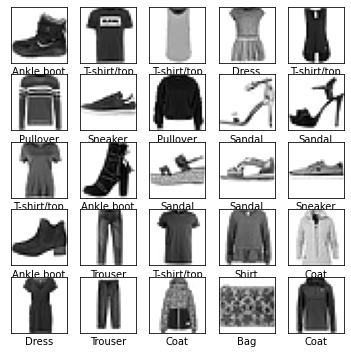

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(6,6))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

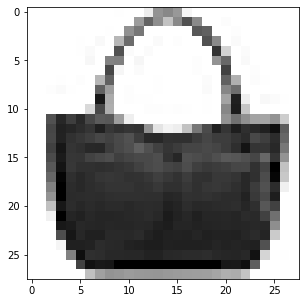

In [7]:
plt.figure(figsize=(5,5))
plt.imshow(train_images[100], cmap=plt.cm.binary)
plt.show()


In [8]:
# Normalize the images.
train_images = (train_images / 255)
test_images = (test_images / 255)

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))


Mạng có 1 lớp vào 784 nút, 2 lớp ẩn mỗi lớp 64 nút, 1 lớp ra 10 nút. Các hàm kích hoạt là relu và softmax

In [16]:
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten

In [17]:
def cnn_model():
    model = Sequential()

    model.add(Conv2D(32, (3,3),activation = 'relu',padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3,3),activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.25))


    model.add(Dense(10, activation='softmax'))
    model.summary()
    return model
model=cnn_model()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)         

In [18]:
# Build the model.
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])


In [ ]:
model.summary()

In [19]:
# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

Huấn luyện mạng 

In [20]:
history=model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10,
  batch_size=32,
)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5036 - accuracy: 0.8216
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3758 - accuracy: 0.8627
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3440 - accuracy: 0.8731
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3200 - accuracy: 0.8819
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3026 - accuracy: 0.8872
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2866 - accuracy: 0.8935
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2751 - accuracy: 0.8981
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2657 - accuracy: 0.8999
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2554 - accuracy: 0.9040
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.247

In [21]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


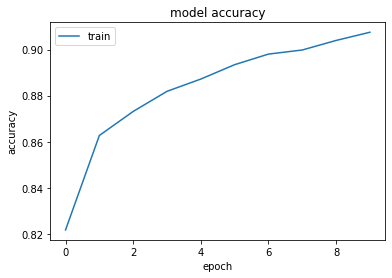

In [22]:
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

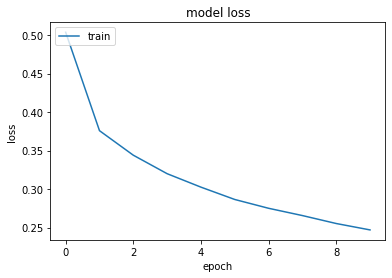

In [23]:
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

313/313 [==============================] - 1s 2ms/step - loss: 0.3358 - accuracy: 0.8824


[0.3358347415924072, 0.8823999762535095]

In [25]:
import keras
model.save('model.h5')

In [26]:
# Predict on the first 5 test images.
predictions = model.predict(test_images[:10])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:10]) # [7, 2, 1, 0, 4]

[9 2 1 1 6 1 4 6 5 7]
[9 2 1 1 6 1 4 6 5 7]


Thử lấy model đã lưu trong model.h5 - không phải đào tạo lại

In [27]:
# Load the model's saved weights.
#model1= model.load_weights('model.h5')

model1= keras.models.load_model('model.h5')


In [28]:
#@tf.autograph.experimental.do_not_convert
# Predict on the first 5 test images.
predictions = model1.predict(test_images[:50])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:50]) # [7, 2, 1, 0, 4]

[9 2 1 1 6 1 4 6 5 7 4 5 5 3 4 1 2 2 8 0 2 5 7 5 1 2 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 0 1 6 7 6 7 2 1 2 6]
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2]
